C:\Users\simon\AppData\Local\Temp\ipykernel_12972\2402255305.py:40: UserWarning: Input data is complex, switching to return_onesided=False
  sfft_f, sfft_t, sfft_y = stft(sine_wave, fd_hz, nperseg=128, noverlap=0)


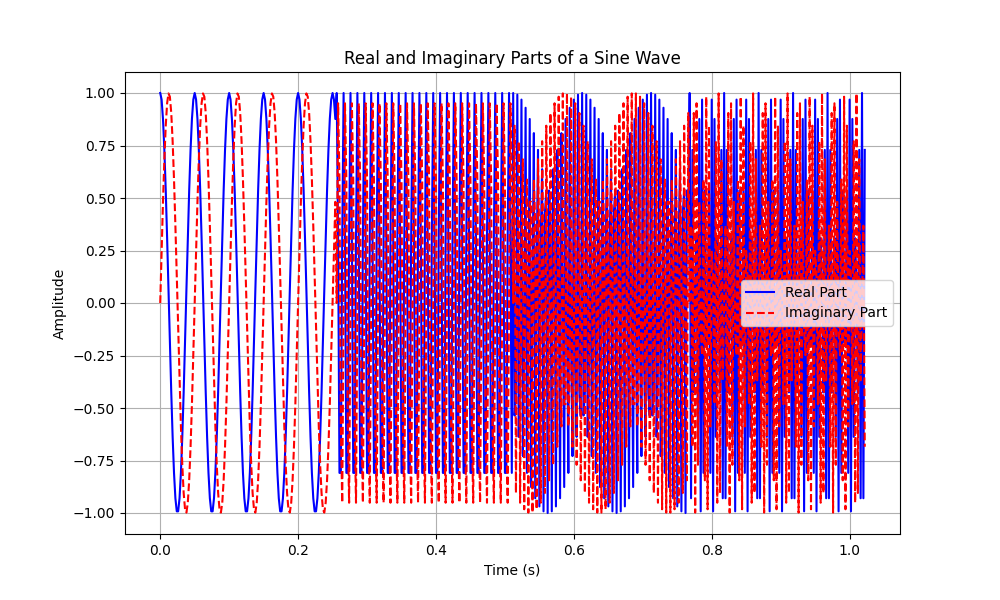

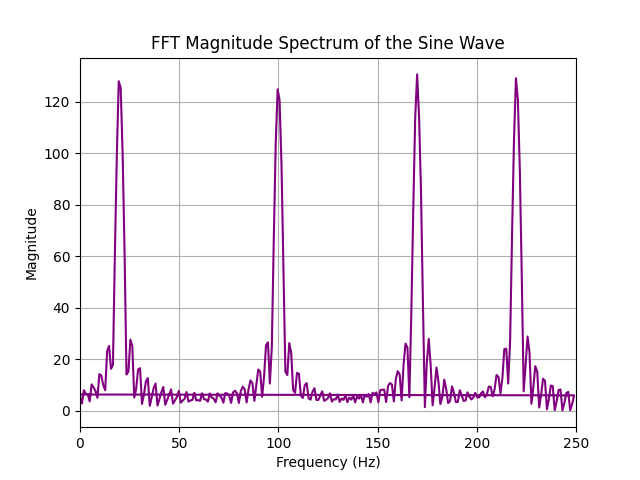

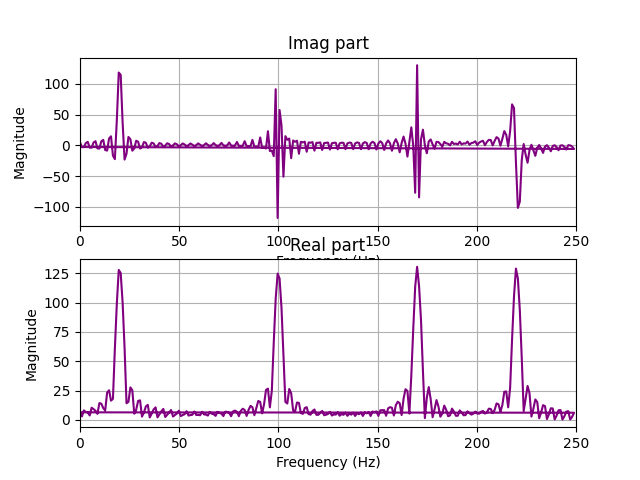

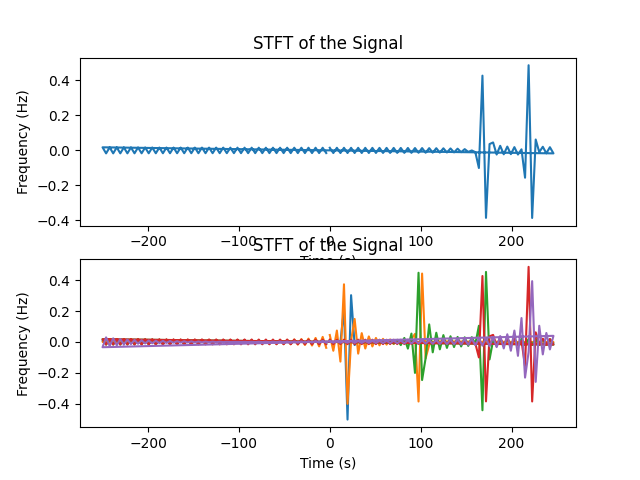

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Parameters for the sine wave
frequency_1_hz = 20
frequency_2_hz = 100
frequency_3_hz = 170
frequency_4_hz = 220
fd_hz = 500
duration = 0.5
duration_samples = 128 * 4
# duration_1 = 1/frequency_1_hz / 1/fd_hz

t = np.linspace(0, duration_samples / fd_hz, int(duration_samples), endpoint=False)

sine_wave_1 = np.exp(2j * np.pi * frequency_1_hz * t)
sine_wave_2 = np.exp(2j * np.pi * frequency_2_hz * t)
sine_wave_3 = np.exp(2j * np.pi * frequency_3_hz * t)
sine_wave_4 = np.exp(2j * np.pi * frequency_4_hz * t)

sine_wave = np.concatenate((sine_wave_1[0:128], sine_wave_2[0:128], sine_wave_3[0:128], sine_wave_4[0:128]))
# sine_wave = sine_wave_1 + sine_wave_2

real_part = np.real(sine_wave)
imag_part = np.imag(sine_wave)

real_part_8bit = np.int8(real_part * 127)
imag_part_8bit = np.int8(imag_part * 127)

real_file_path = "fpga_core_test_signals/fft_continous_real_input.txt"
imag_file_path = "fpga_core_test_signals/fft_continous_imag_input.txt"
np.savetxt(real_file_path, real_part_8bit, fmt="%d")
np.savetxt(imag_file_path, imag_part_8bit, fmt="%d")

fft_result = np.fft.fft(sine_wave)
fft_freqs = np.fft.fftfreq(len(t), d=1 / fd_hz)  # Frequency axis

sfft_f, sfft_t, sfft_y = stft(sine_wave, fd_hz, nperseg=128, noverlap=0)

# Plot the sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, real_part, label="Real Part", color="blue")
plt.plot(t, imag_part, label="Imaginary Part", color="red", linestyle="dashed")
plt.title("Real and Imaginary Parts of a Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(fft_freqs, np.abs(fft_result), color="purple")
plt.title("FFT Magnitude Spectrum of the Sine Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, fd_hz / 2)  # Show only the positive frequencies
plt.show()

plt.figure()
plt.subplot(211)
plt.plot(fft_freqs, np.real(fft_result), color="purple")
plt.title("Imag part")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, fd_hz / 2)

plt.subplot(212)
plt.plot(fft_freqs, np.abs(fft_result), color="purple")
plt.title("Real part")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, fd_hz / 2)
plt.show()

# Plot STFT
plt.figure()
plt.subplot(211)
# plt.pcolormesh(sfft_t, sfft_f, np.abs(sfft_y), shading='gouraud')
plt.plot(sfft_f, np.real(sfft_y)[:, 3])
plt.title("STFT of the Signal")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
# plt.colorbar(label='Amplitude')
plt.subplot(212)
plt.plot(sfft_f, np.real(sfft_y))
plt.title("STFT of the Signal")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.show()

# plt.figure()
# plt.plot(sfft_f)
# plt.show()

# plt.figure()
# plt.subplot(211)
# plt.plot(fft_freqs, np.real(sfft_y), color="purple")
# plt.title("Imag part")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.grid()
# plt.xlim(0, fd_hz / 2)
# plt.subplot(212)
# plt.plot(fft_freqs, np.abs(sfft_y), color="purple")
# plt.title("Real part")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.grid()
# plt.xlim(0, fd_hz / 2)
# plt.show()